In [1]:
import numpy as np
import os
import re
import math

# Problem 2.1

### Part (a)

In [2]:
folder_path1 = "/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset2/pset2_data/hic_part1" # 133 files
folder_path2 = "/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset2/pset2_data/hic_part2" # 120 files

sums = np.zeros(231)
avgs = np.zeros(231) # each entry is the sum of the log(1+freq) across data in one file
stds = np.zeros(231) # each entry is the sum of squares of the log(1+freq) across data in one file
dims = np.zeros(22) # element i is the max dimension of the i+1th chromosome
sum_squares = np.zeros(231)
non_zero_entries = np.zeros(231)

inter_chromosome_sites_1 = [(f'chr{i}_chr{j}.txt', i, j) for i in range(1, 8) for j in range(i, 23) if i != j]
inter_chromosome_sites_2 = [(f'chr{i}_chr{j}.txt', i, j) for i in range(8, 23) for j in range(i, 23) if i != j]

In [3]:
# AVERAGES

count = 0 # what file we are on

for filename, i, j in inter_chromosome_sites_1: # hic_part1
    file_path = os.path.join(folder_path1, filename)
    sparse = np.loadtxt(file_path)
    sparse = sparse[~np.isnan(sparse).any(axis=1)]
    non_zero_entries[count] = sparse.shape[0]

    sparse[:, 2] = np.log1p(sparse[:, 2])
    sparse[:, 0] /= 250000
    sparse[:, 1] /= 250000

    chr1_dim = np.max(sparse[:, 0])
    chr2_dim = np.max(sparse[:, 1])

    dims[i-1] = max(dims[i-1], chr1_dim)
    dims[j-1] = max(dims[j-1], chr2_dim)

    file_sum = np.sum(sparse[:, 2])

    sums[count] = file_sum
    count+=1


for filename, i, j in inter_chromosome_sites_2: # hic_part1
    file_path = os.path.join(folder_path2, filename)
    sparse = np.loadtxt(file_path)
    sparse = sparse[~np.isnan(sparse).any(axis=1)]
    non_zero_entries[count] = sparse.shape[0]


    sparse[:, 2] = np.log1p(sparse[:, 2])
    sparse[:, 0] /= 250000
    sparse[:, 1] /= 250000

    chr1_dim = np.max(sparse[:, 0])
    chr2_dim = np.max(sparse[:, 1])

    dims[i-1] = max(dims[i-1], chr1_dim)
    dims[j-1] = max(dims[j-1], chr2_dim)

    file_sum = np.sum(sparse[:, 2])

    sums[count] = file_sum
    count+=1

In [4]:
count = 0
sumdims = 0


for filename, i, j in inter_chromosome_sites_1:
    avgs[count] = sums[count]/((dims[i-1]+1)*(dims[j-1]+1))
    sumdims += (dims[i-1]+1)*(dims[j-1]+1)
    count += 1

for filename, i, j in inter_chromosome_sites_2:
    avgs[count] = sums[count]/((dims[i-1]+1)*(dims[j-1]+1))
    sumdims += (dims[i-1]+1)*(dims[j-1]+1)
    count += 1

In [5]:
print(avgs)

overallavg = sum(sums)/sumdims
print(overallavg)



[0.6885681  0.72671095 0.70134617 0.69049666 0.69723381 0.66852614
 0.66403038 0.50957422 0.64639191 0.64699846 0.6537848  0.61113986
 0.59906915 0.58248221 0.49642518 0.56677681 0.53789835 0.47169618
 0.47774946 0.40828383 0.45505146 0.79083028 0.77292145 0.75550182
 0.76738531 0.72959371 0.73178234 0.55958301 0.70581478 0.71960072
 0.71980563 0.65288807 0.64014141 0.61347436 0.55211461 0.62957012
 0.58793164 0.5378022  0.54897217 0.48656483 0.48776051 0.836906
 0.82969114 0.85692022 0.81418768 0.80917941 0.64563032 0.8031936
 0.81603503 0.82222493 0.66045208 0.65081377 0.62192023 0.67410567
 0.77501167 0.72333055 0.73098548 0.73124439 0.5081453  0.48005072
 0.80798877 0.82481243 0.80434209 0.79239925 0.63792782 0.78680908
 0.80441418 0.81389803 0.66410696 0.66097851 0.63462455 0.67287553
 0.78203546 0.73495301 0.75328968 0.72022733 0.53409168 0.48948327
 0.82601507 0.79950969 0.79887755 0.63996348 0.79006394 0.80530975
 0.81186627 0.66741619 0.65750947 0.62681868 0.68750246 0.7714481

In [6]:
# STDS

count = 0 # what file we are on

for filename, i, j in inter_chromosome_sites_1: # hic_part1
    file_path = os.path.join(folder_path1, filename)
    sparse = np.loadtxt(file_path)
    sparse = sparse[~np.isnan(sparse).any(axis=1)]

    sparse[:, 2] = np.log1p(sparse[:, 2])
    sparse[:, 0] /= 250000
    sparse[:, 1] /= 250000

    file_sum_squares = np.sum((sparse[:, 2] - avgs[count])**2)

    sum_squares[count] = file_sum_squares
    count+=1


for filename, i, j in inter_chromosome_sites_2: # hic_part1
    file_path = os.path.join(folder_path2, filename)
    sparse = np.loadtxt(file_path)
    sparse = sparse[~np.isnan(sparse).any(axis=1)]

    sparse[:, 2] = np.log1p(sparse[:, 2])
    sparse[:, 0] /= 250000
    sparse[:, 1] /= 250000

    file_sum_squares = np.sum((sparse[:, 2] - avgs[count])**2)

    sum_squares[count] = file_sum_squares
    count+=1



In [7]:
count = 0
total_zero_entries = 0

for filename, i, j in inter_chromosome_sites_1:
    zero_entries = (dims[i-1]+1)*(dims[j-1]+1) - non_zero_entries[count]
    stds[count] = math.sqrt((sum_squares[count] + zero_entries*(avgs[count])**2)/((dims[i-1]+1)*(dims[j-1]+1)-1))
    total_zero_entries += zero_entries
    count += 1

for filename, i, j in inter_chromosome_sites_2:
    zero_entries = (dims[i-1]+1)*(dims[j-1]+1) - non_zero_entries[count]
    stds[count] = math.sqrt((sum_squares[count] + zero_entries*(avgs[count])**2)/((dims[i-1]+1)*(dims[j-1]+1)-1))
    total_zero_entries += zero_entries
    count += 1

In [8]:
print(stds)
overallstd = math.sqrt((sum(sum_squares) + total_zero_entries*(overallavg)**2)/((sumdims-1)))
print(overallstd)

[0.69952323 0.68299781 0.69598097 0.68009019 0.67299188 0.67221117
 0.65605581 0.63219452 0.65805808 0.64366531 0.64299646 0.62767585
 0.61618963 0.60916256 0.6069258  0.60596404 0.60480361 0.57812783
 0.57634052 0.54537454 0.56240944 0.69056616 0.71163755 0.68979705
 0.68186252 0.68221029 0.66568325 0.64792282 0.66430322 0.6543696
 0.65179689 0.64088915 0.62526652 0.61186373 0.6244426  0.60553805
 0.62646699 0.58549225 0.5994452  0.57715383 0.57145058 0.67105162
 0.65489258 0.64382257 0.64635654 0.62952642 0.6340987  0.6237731
 0.61129399 0.60707294 0.62280319 0.60987485 0.59739752 0.60023019
 0.55262087 0.58588634 0.54451976 0.55215829 0.57722943 0.54849066
 0.67040159 0.65693591 0.66489455 0.64731373 0.64578717 0.63930185
 0.62715653 0.62425873 0.64214728 0.63014514 0.61742439 0.61788673
 0.57076946 0.60963107 0.57011543 0.5747135  0.61499681 0.57680254
 0.64221675 0.64777013 0.63396672 0.63515965 0.62658931 0.61274888
 0.61227077 0.62985503 0.61616764 0.60429665 0.61242918 0.557618

### Part (b)

In [9]:
import matplotlib.pyplot as plt
import scipy.sparse as sp

236.0
251.0


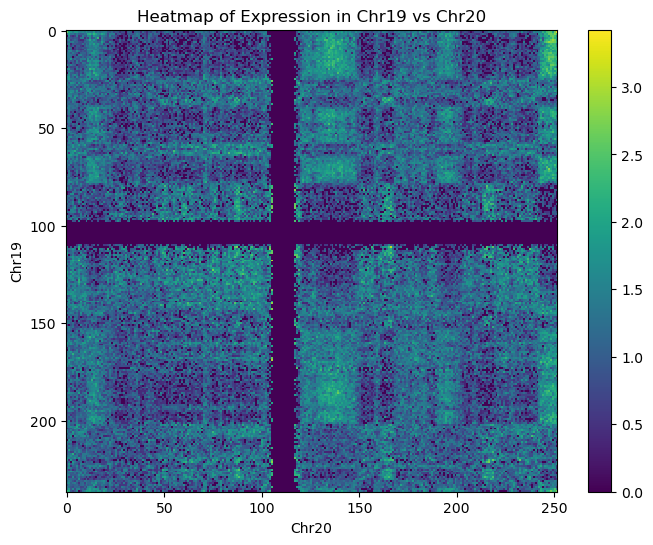

In [10]:
path_19_20 = "/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset2/pset2_data/hic_part2/chr19_chr20.txt"
char19_char20 = np.loadtxt(path_19_20)

# normalize matrix locations
char19_char20[:, 0] /= 250000
char19_char20[:, 1] /= 250000

rows = char19_char20[:, 0]
cols = char19_char20[:, 1]

print(np.max(rows))
print(np.max(cols))
char19_char20[:, 2] = np.log1p(char19_char20[:, 2])
data = char19_char20[:, 2]

sparse_matrix = sp.csr_matrix((data, (rows, cols)), shape=(237, 252))
dense_matrix = sparse_matrix.toarray()

plt.figure(figsize=(8, 6))
plt.imshow(dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap of Expression in Chr19 vs Chr20")
plt.ylabel("Chr19")
plt.xlabel("Chr20")
plt.savefig('expression_heatmap_19-20.png', format='png')
plt.show()

### Part (d)

In [11]:
import random
import scipy.stats as stats

def calc_pval(m, rows, cols, mu, sigma):
    return float(1-stats.norm.cdf((m-mu)*math.sqrt(rows*cols)/sigma))

def greedy_search(rows, cols, mu, sigma, matrix):

    start_row = random.randint(0, rows-1)
    start_col = random.randint(0, cols-1)

    rows_start = start_row
    rows_end = start_row+1
    cols_start = start_col
    cols_end = start_col+1

    submatrix = matrix[rows_start:rows_end, cols_start:cols_end]
    m = np.mean(submatrix)
    p_value = calc_pval(m, rows_end-rows_start, cols_end-cols_start, mu, sigma)

    while True:

        #row up
        if rows_start-1 >= 0:
            submatrix = matrix[rows_start-1:rows_end, cols_start:cols_end]
            m = np.mean(submatrix)
            p_value_up = calc_pval(m, rows_end-rows_start+1, cols_end-cols_start, mu, sigma)

        else:
            p_value_up = 1

        #row down
        if rows_end+1 <= rows:
            submatrix = matrix[rows_start:rows_end+1, cols_start:cols_end]
            m = np.mean(submatrix)
            p_value_down = calc_pval(m, rows_end-rows_start+1, cols_end-cols_start, mu, sigma)

        else:
            p_value_down = 1

        #col left
        if cols_start-1 >= 0:
            submatrix = matrix[rows_start:rows_end, cols_start-1:cols_end]
            m = np.mean(submatrix)
            p_value_left = calc_pval(m, rows_end-rows_start, cols_end-cols_start+1, mu, sigma)

        else:
            p_value_left = 1

        # col right
        if cols_end+1 <= cols:
            submatrix = matrix[rows_start:rows_end, cols_start:cols_end+1]
            m = np.mean(submatrix)
            p_value_right = calc_pval(m, rows_end-rows_start, cols_end-cols_start+1, mu, sigma)

        else:
            p_value_right = 1


        min_p = min(p_value_up, p_value_down, p_value_left, p_value_right)

        if min_p >= p_value:
            return (p_value, rows_start, rows_end, cols_start, cols_end)

        else:
            p_value = min_p
            if p_value_up == min_p:
                rows_start -= 1
            elif p_value_down == min_p:
                rows_end += 1
            elif p_value_left == min_p:
                cols_start -= 1
            elif p_value_right == min_p:
                cols_end += 1



mu = overallavg
sigma = overallstd

print(greedy_search(237, 252, mu, sigma, dense_matrix))





(0.38012322746060734, 172, 173, 27, 32)


25723


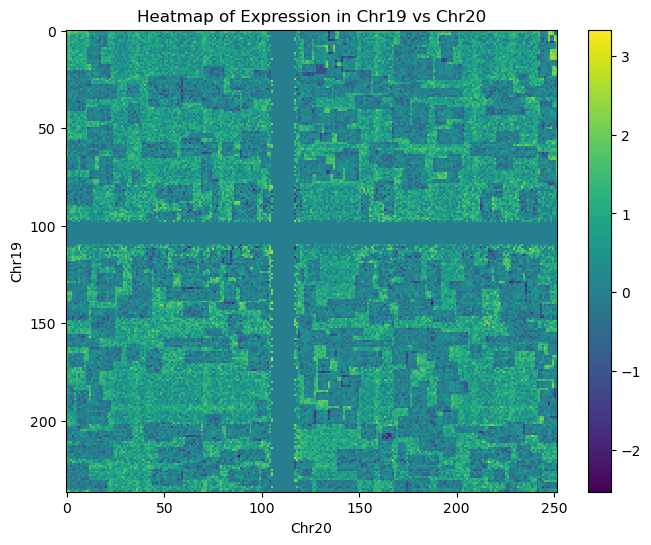

In [12]:
# Getting post matrix

def modify_matrix(matrix, rows, cols):
    interaction_counts = np.zeros_like(matrix, dtype=bool)
    while True:
        small_p_value = 1
        small_rows_start = 0
        small_rows_end = 0
        small_cols_start = 0
        small_cols_end = 0

        for _ in range(20):
            p_value, rows_start, rows_end, cols_start, cols_end = greedy_search(rows, cols, mu, sigma, matrix)

            small_p_value = min(p_value, small_p_value)

            if p_value == small_p_value:
                small_rows_start = rows_start
                small_rows_end = rows_end
                small_cols_start = cols_start
                small_cols_end = cols_end

        if small_p_value > 0.01:
            break

        submatrix = matrix[small_rows_start:small_rows_end, small_cols_start:small_cols_end]
        interaction_counts[small_rows_start:small_rows_end, small_cols_start:small_cols_end] = True

        m = np.mean(submatrix)

        matrix[small_rows_start:small_rows_end, small_cols_start:small_cols_end] -= m

    return np.sum(interaction_counts)
        
dense_matrix = sparse_matrix.toarray()
print(modify_matrix(dense_matrix, 237, 252))

plt.figure(figsize=(8, 6))
plt.imshow(dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap of Expression in Chr19 vs Chr20")
plt.ylabel("Chr19")
plt.xlabel("Chr20")
plt.savefig('modified_heatmap_19-20.png', format='png')
plt.show()


### Part (e)

In [13]:
count_heatmap = np.zeros((22, 22))

inter_chromosome_sites_1_same = [(f'chr{i}_chr{j}.txt', i, j) for i in range(1, 8) for j in range(i, 23)]
inter_chromosome_sites_2_same = [(f'chr{i}_chr{j}.txt', i, j) for i in range(8, 23) for j in range(i, 23)]

total_interactions = 0

def count_interaction(filename, i, j):
    file_path = os.path.join(folder_path2, filename)
    sparse = np.loadtxt(file_path)
    
    sparse = sparse[~np.isnan(sparse).any(axis=1)]
    
    sparse[:, :2] /= 250000
    sparse[:, 2] = np.log1p(sparse[:, 2])
    
    rows = sparse[:, 0].astype(int)
    cols = sparse[:, 1].astype(int)
    data = sparse[:, 2]
    
    total_rows = rows.max() + 1
    total_cols = cols.max() + 1
    
    sparse_mat = sp.csr_matrix((data, (rows, cols)), shape=(total_rows, total_cols))
    dense_matrix = sparse_mat.toarray()
    
    interaction_counts = modify_matrix(dense_matrix, total_rows, total_cols)
    
    count_heatmap[i][j] = interaction_counts
    count_heatmap[j][i] = interaction_counts
    
    return interaction_counts

count_interaction("chr8_chr8.txt", 8, 8)



KeyboardInterrupt: 

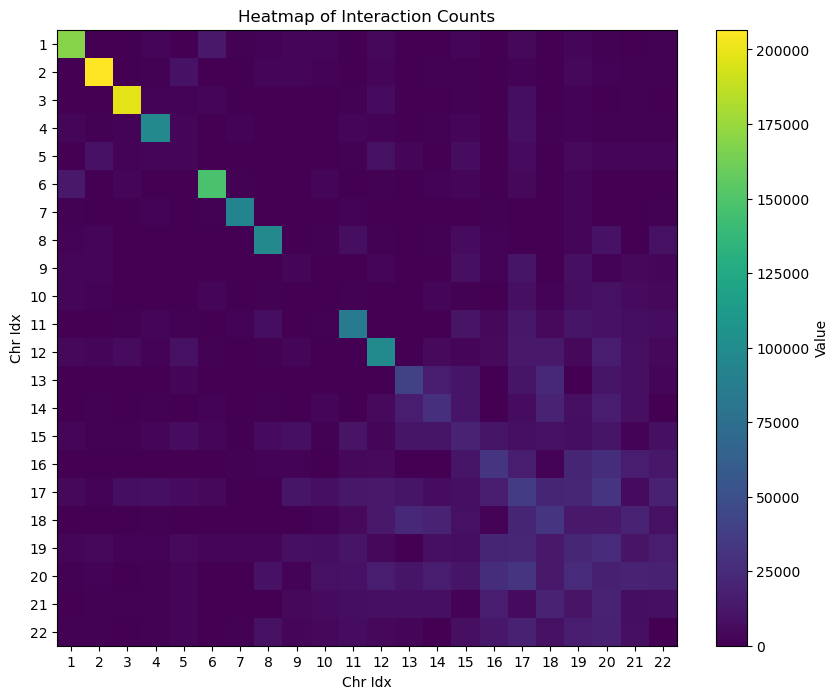

In [14]:
counts = np.loadtxt("counts.txt")
counts = counts.reshape(22, 22).T
counts = counts[::-1, :]

plt.figure(figsize=(10, 8))
plt.imshow(counts, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Heatmap of Interaction Counts')
plt.xlabel('Chr Idx')
plt.ylabel('Chr Idx')
plt.xticks(np.arange(counts.shape[1]), np.arange(1, counts.shape[1] + 1))  # 1-index the column ticks
plt.yticks(np.arange(counts.shape[0]), np.arange(1, counts.shape[0] + 1))  # 1-index the row ticks
plt.savefig('interaction_counts.png', format='png')
plt.show()



### Part (f)

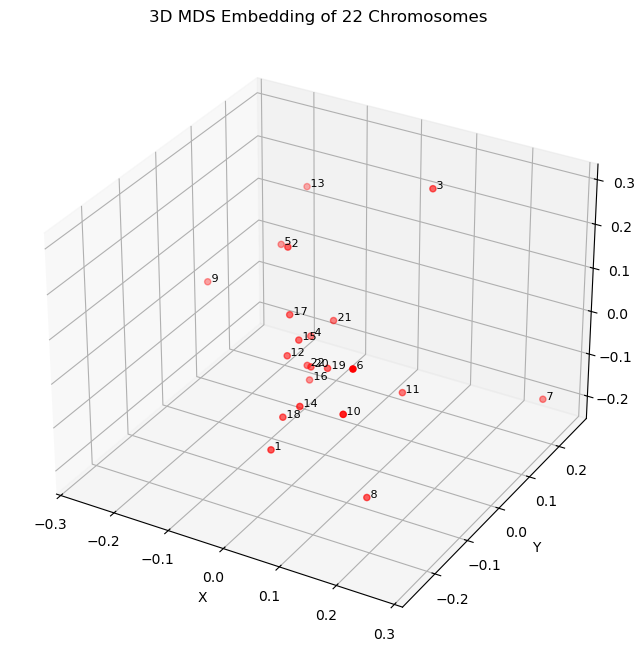

In [381]:
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=42)

dmatrix = 1 / (1 + (counts + counts.T) / 2)
embedding = mds.fit_transform(dmatrix)

# Now let's plot the 3D embedding
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c='r', marker='o')

# Label the chromosomes (assuming chromosomes are numbered 1 to 22)
for i in range(22):
    ax.text(embedding[i, 0], embedding[i, 1], embedding[i, 2], f' {i+1}', size=8)

# Set the labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Title
ax.set_title('3D MDS Embedding of 22 Chromosomes')

# Show the plot
plt.savefig('3D_MDS.png', format='png')
plt.show()